# EDA

# XAI for House Price Prediction (Boston Housing)

This notebook performs **Exploratory Data Analysis (EDA)** to understand the dataset, the target (`medv`), feature distributions, relationships, and potential data issues (outliers, skew, multicollinearity).  
These findings guide **modeling and explainability** choices (what to standardize/transform and what patterns to expect from explanations).

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

ROOT = Path.cwd().parent
DATA_PATH = ROOT / "data" / "processed_housing.csv"

df = pd.read_csv(DATA_PATH)

display(df.head())
print("Shape:", df.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Shape: (506, 14)


In [3]:
# --- 1) Data overview / quality checks ---
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top):")
display(missing[missing > 0])

print("Duplicates:", df.duplicated().sum())

# Basic numeric summary
display(df.describe().T)

Columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

Dtypes:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Missing values (top):


Series([], dtype: int64)

Duplicates: 0


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


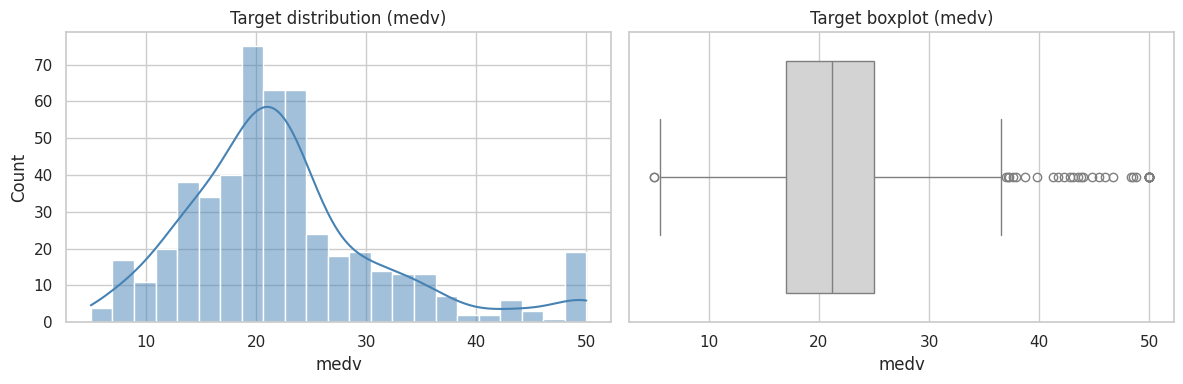

medv summary:


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

medv skew: 1.1080984082549072
medv kurtosis: 1.495196944165818
medv == 50 count: 16
medv == 50 proportion: 0.03162055335968379


In [4]:
# --- 2) Target analysis: medv ---
target = "medv"

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[target], kde=True, ax=ax[0], color="steelblue")
ax[0].set_title("Target distribution (medv)")

sns.boxplot(x=df[target], ax=ax[1], color="lightgray")
ax[1].set_title("Target boxplot (medv)")

plt.tight_layout()
plt.show()

print("medv summary:")
display(df[target].describe())
print("medv skew:", float(df[target].skew()))
print("medv kurtosis:", float(df[target].kurt()))

# Check for typical Boston Housing ceiling at 50
print("medv == 50 count:", int((df[target] == 50).sum()))
print("medv == 50 proportion:", float((df[target] == 50).mean()))

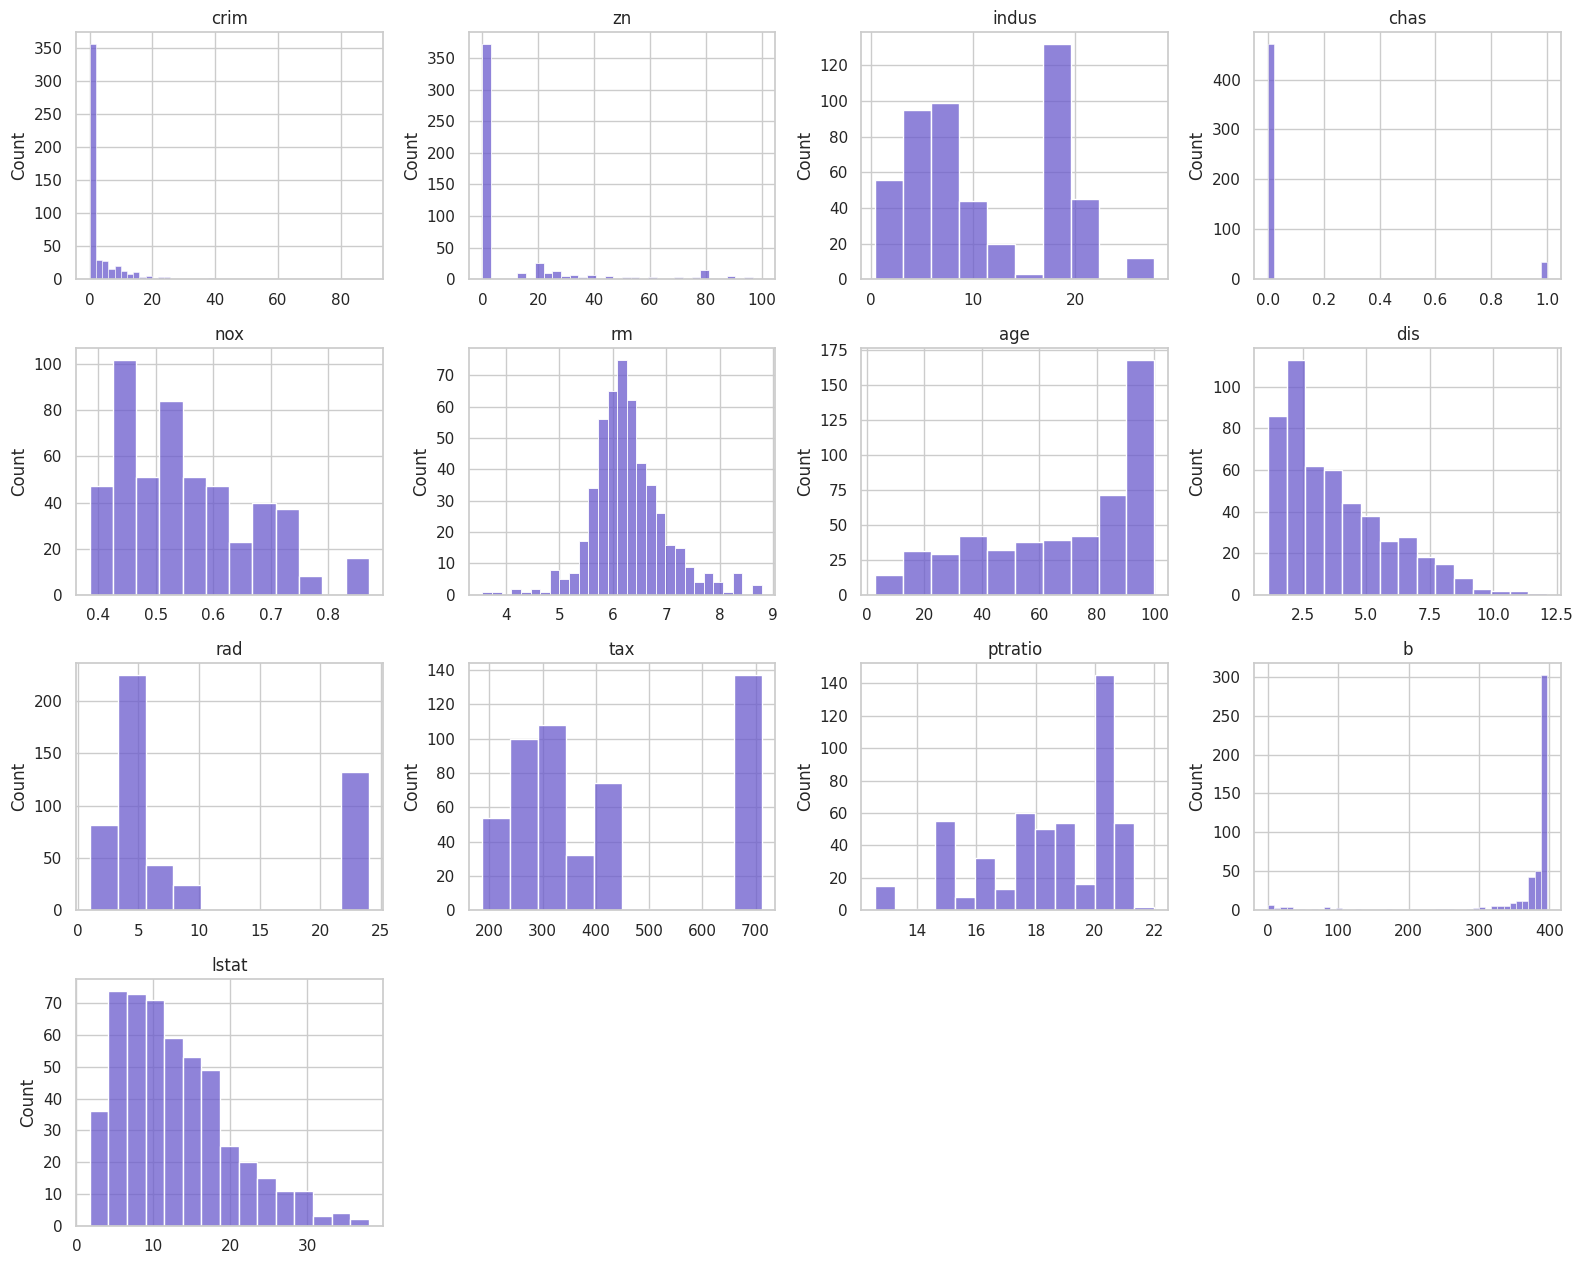

,skewness
crim,5.223149
chas,3.405904
b,-2.890374
zn,2.225666
dis,1.011781
rad,1.004815
lstat,0.906460
ptratio,-0.802325
nox,0.729308
tax,0.669956


In [ ]:
# --- 3) Feature distributions (univariate) ---
feature_cols = [c for c in df.columns if c != target]

ncols = 4
nrows = int(np.ceil(len(feature_cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3.2 * nrows))
axes = np.array(axes).reshape(nrows, ncols)

for i, col in enumerate(feature_cols):
    ax = axes[i // ncols, i % ncols]
    sns.histplot(df[col], kde=False, ax=ax, color="slateblue")
    ax.set_title(col)
    ax.set_xlabel("")
    
for j in range(i + 1, nrows * ncols):
    axes[j // ncols, j % ncols].axis("off")

plt.tight_layout()
plt.show()

# skewness scan (useful for deciding log/robust scaling; also affects explanation stability)
skew = df[feature_cols].skew(numeric_only=True).sort_values(key=np.abs, ascending=False)
display(skew.to_frame("skewness").head(10))